# Import Dataset

In [1]:
import pandas as pd
df = pd.read_csv("/Users/jiaying/Dropbox/My Mac (Jia-Yings-MacBook-Pro.local)/Documents/BC3409 AI in Accounting and Finance/Final Assignment/Credit Card Default II (balance).csv")

In [2]:
import numpy as np
np.random.seed(2022)

In [3]:
print(df)

            income        age          loan  default
0     66155.925100  59.017015   8106.532131        0
1     34415.153970  48.117153   6564.745018        0
2     57317.170060  63.108049   8020.953296        0
3     42709.534200  45.751972   6103.642260        0
4     66952.688850  18.584336   8770.099235        1
...            ...        ...           ...      ...
3423  60903.191726  21.933924  10367.081892        1
3424  62235.644695  25.033016   8083.900063        1
3425  25597.850590  26.350344   3810.110335        1
3426  48164.194974  23.141976   6529.652892        1
3427  33055.808635  26.289612   5351.851138        1

[3428 rows x 4 columns]


# Data Wrangling

1. Check Data Imbalance
2. Remove NA and Non number
3. Remove Outlier
4. Normalization
5. Categorical input (dummy variable)
6. Correlation

1. Check Data Imbalance

In [4]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas

Counter(df["default"])

Counter({0: 1714, 1: 1714})

Since there are equal number of observations for both classes (0 and 1) of the dependent variable ("default"), the dataset is balanced and no further action is required.

2. Remove NAs and non-numbers

In [5]:
df = df.dropna()

In [6]:
print(df)

            income        age          loan  default
0     66155.925100  59.017015   8106.532131        0
1     34415.153970  48.117153   6564.745018        0
2     57317.170060  63.108049   8020.953296        0
3     42709.534200  45.751972   6103.642260        0
4     66952.688850  18.584336   8770.099235        1
...            ...        ...           ...      ...
3423  60903.191726  21.933924  10367.081892        1
3424  62235.644695  25.033016   8083.900063        1
3425  25597.850590  26.350344   3810.110335        1
3426  48164.194974  23.141976   6529.652892        1
3427  33055.808635  26.289612   5351.851138        1

[3428 rows x 4 columns]


The number of rows (3428) is the same as earlier and therefore, there are no NA values

In [7]:
for i in df.columns:
    df1 = pd.to_numeric(df[i], errors = "coerce") 
    f = df1.notnull() 
    df=df[f] 
print(df)

            income        age          loan  default
0     66155.925100  59.017015   8106.532131        0
1     34415.153970  48.117153   6564.745018        0
2     57317.170060  63.108049   8020.953296        0
3     42709.534200  45.751972   6103.642260        0
4     66952.688850  18.584336   8770.099235        1
...            ...        ...           ...      ...
3423  60903.191726  21.933924  10367.081892        1
3424  62235.644695  25.033016   8083.900063        1
3425  25597.850590  26.350344   3810.110335        1
3426  48164.194974  23.141976   6529.652892        1
3427  33055.808635  26.289612   5351.851138        1

[3428 rows x 4 columns]


The number of rows (3428) is the same as earlier and therefore, there are no non-numbers

3. Remove Outliers

<AxesSubplot:xlabel='income'>

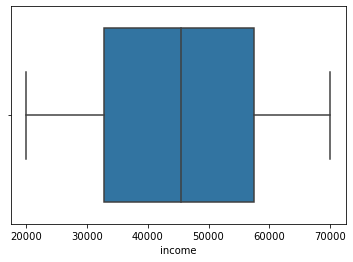

In [8]:
import seaborn as sns
sns.boxplot(x = df['income']) 

There are no outliers for income

<AxesSubplot:xlabel='age'>

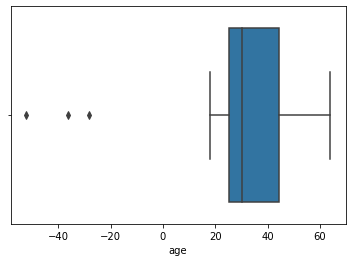

In [9]:
sns.boxplot(x = df['age']) 

There are 3 outliers for age which are negative values. Further action is required (see below)

<AxesSubplot:xlabel='loan'>

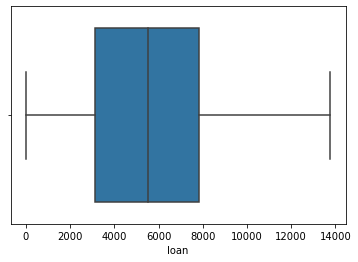

In [10]:
sns.boxplot(x = df['loan']) 

There are no outliers for loan

<AxesSubplot:xlabel='default'>

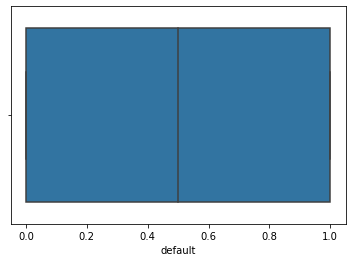

In [11]:
sns.boxplot(x = df['default']) 

There are no outliers for default

In [12]:
# Removing outliers from age

Q1 = np.percentile(df["age"],25, interpolation = "midpoint")
Q3 = np.percentile(df["age"],75, interpolation = "midpoint")
IQR = Q3 - Q1 

upper = np.where(df["age"] >= (Q3 + 1.5*IQR))
lower = np.where(df["age"] <= (Q1 - 1.5*IQR))

In [13]:
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

In [14]:
print(df) 

            income        age          loan  default
0     66155.925100  59.017015   8106.532131        0
1     34415.153970  48.117153   6564.745018        0
2     57317.170060  63.108049   8020.953296        0
3     42709.534200  45.751972   6103.642260        0
4     66952.688850  18.584336   8770.099235        1
...            ...        ...           ...      ...
3423  60903.191726  21.933924  10367.081892        1
3424  62235.644695  25.033016   8083.900063        1
3425  25597.850590  26.350344   3810.110335        1
3426  48164.194974  23.141976   6529.652892        1
3427  33055.808635  26.289612   5351.851138        1

[3425 rows x 4 columns]


There are 3425 rows, which suggests that 3 rows have been dropped. Nonetheless, perform a last check to ensure that income, age and loan have values > 0

In [15]:
df = df.loc[(df["income"] > 0) & (df["age"] > 0) & (df["loan"] > 0)]
print(df)

            income        age          loan  default
0     66155.925100  59.017015   8106.532131        0
1     34415.153970  48.117153   6564.745018        0
2     57317.170060  63.108049   8020.953296        0
3     42709.534200  45.751972   6103.642260        0
4     66952.688850  18.584336   8770.099235        1
...            ...        ...           ...      ...
3423  60903.191726  21.933924  10367.081892        1
3424  62235.644695  25.033016   8083.900063        1
3425  25597.850590  26.350344   3810.110335        1
3426  48164.194974  23.141976   6529.652892        1
3427  33055.808635  26.289612   5351.851138        1

[3425 rows x 4 columns]


4. Normalisation

There is no need to normalise the data as normalisation only helps with the converging of data. Since there is very few data as well as x variables (3 variables) in this dataset, normalisation is not required. Nonetheless, however, normalization will be performed before forming the neural network model to increase the accuracy of the model.

5. Categorical input

There is no need to perform this step as all the inputs (x variables) are continous. 

6. Consider correlation between variables

In [16]:
df.corr()

,income,age,loan,default
income,1.000000,-0.027822,0.556023,-0.012557
age,-0.027822,1.000000,-0.250988,-0.668806
loan,0.556023,-0.250988,1.000000,0.508755
default,-0.012557,-0.668806,0.508755,1.000000


<AxesSubplot:>

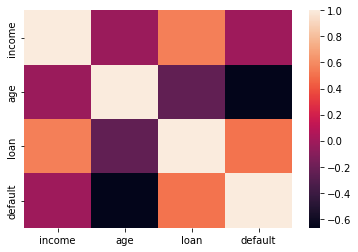

In [17]:
sns.heatmap(df.corr())

# Splitting Dataset

In [18]:
X = df.loc[:,["income", "age", "loan"]]
Y = df.loc[:,["default"]]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
print(X_train, X_test, Y_train, Y_test)

            income        age          loan
2474  20533.825914  29.004545   2739.757769
1136  59208.716080  30.931152  11479.437810
518   25789.209800  26.494170   2410.277414
2591  31632.488211  32.200377   5181.690784
1175  56696.458600  57.520253   9686.630307
...            ...        ...           ...
1716  36598.340470  41.962130   6849.294810
627   52986.004550  50.423763   4928.607034
176   38625.632010  19.630038   5836.563381
1247  22449.077390  35.765779   1187.426950
896   68004.686220  41.531097   2698.047781

[2397 rows x 3 columns]             income        age         loan
7     24500.141980  32.897548  2971.003310
3348  50173.888499  26.629677  8160.220393
690   59253.121460  36.920412  7327.283577
1429  60912.798960  60.687364  3870.333893
2082  27212.547212  20.862828  4517.049705
...            ...        ...          ...
890   49972.010830  32.396984   763.954116
1702  65824.837380  19.673241   154.945616
1195  24951.257490  62.041140  2544.356003
22    23329.31941

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

  feature        VIF
0  income  12.181603
1     age   5.139917
2    loan   6.209883


Generally, for any models, the VIF of each variable should be considered and any variable which has a VIF value of > 5 should be removed. Nonetheless, as this dataset only has 3 independent variables, none of the variables will be removed

# Models

 Logistic Regression

In [21]:
from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(X_train, Y_train)

pred = model.predict(X_train)

/Users/jiaying/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train, pred)
print(cm)

accuracy = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

[[1103   89]
 [  41 1164]]
0.9457655402586567


In [23]:
pred = model.predict(X_test)

In [24]:
cm = confusion_matrix(Y_test, pred)
print(cm)

# Confusion Matrix
 # True Positive - 491
 # True Negative - 28
 # False Negative - 20
 # True Negative - 489

[[491  28]
 [ 20 489]]


In [25]:
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

# Accuracy - 95.33%

0.953307392996109


/Users/jiaying/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


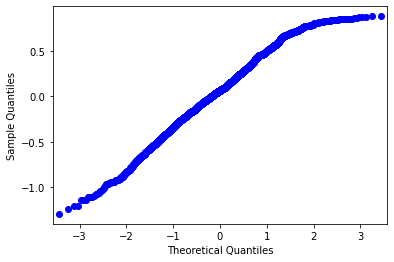

In [26]:
# QQ plot - check heteroskedasticity 
import statsmodels.api as sm
from matplotlib import pyplot as plt
mod_fit = sm.OLS(Y,X).fit()
res = mod_fit.resid # residuals
fig = sm.qqplot(res)
plt.show()

The model seems to be working well

In [27]:
import pickle

filename = 'logistic_regression.sav'
pickle.dump(model, open(filename, 'wb'))

In [28]:
logreg_model = pickle.load(open("logistic_regression.sav", 'rb'))

X_test1 = [[1000000,25,300]]
pred = logreg_model.predict(X_test1)
print(pred)

[0]


/Users/jiaying/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Decision Tree
1. Phase 1 - Grow the tree
2. Phase 2 - Prune the tree

In [29]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 3)

model.fit(X_train, Y_train)
pred = model.predict(X_train)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, pred)
print(cm)

accuracy = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

[[1038  154]
 [   0 1205]]
0.9357530246141009


In [31]:
pred = model.predict(X_test)

cm = confusion_matrix(Y_test, pred)
print(cm)

# Confusion Matrix
 # True Positive - 465
 # True Negative - 54
 # False Negative - 2
 # True Negative - 507

[[465  54]
 [  2 507]]


In [32]:
accuracy = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

# Accuracy - 94.55%

0.9455252918287937


In [33]:
fr = model.feature_importances_
print(fr)

[0.         0.71275662 0.28724338]


In [34]:
import math
from sklearn.model_selection import GridSearchCV

model = tree.DecisionTreeClassifier()
grid = GridSearchCV(estimator = model, param_grid = dict(max_depth = [i for i in range(1, 20)]))
grid_results = grid.fit(X, Y)
grid_results.best_params_

{'max_depth': 10}

In [35]:
import math
from sklearn.model_selection import GridSearchCV

model = tree.DecisionTreeClassifier()
grid = GridSearchCV(estimator = model, param_grid = dict( min_samples_split = [i for i in range(3, 20)]))
grid_results = grid.fit(X, Y)
grid_results.best_params_

{'min_samples_split': 6}

In [36]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 10) # Based on optimisation

model.fit(X_train, Y_train)
pred = model.predict(X_train)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, pred)
print(cm)
accuracy = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

[[1192    0]
 [   0 1205]]
1.0


In [38]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print(cm)

# Confusion Matrix
 # True Positive - 509
 # True Negative - 10
 # False Negative - 6
 # True Negative - 503

[[509  10]
 [  6 503]]


In [39]:
accuracy = (cm[0,0]+cm[1,1])/sum(sum(cm))
print(accuracy)

# Accuracy - 98.44%

0.9844357976653697


In [40]:
fr = model.feature_importances_
print(fr)

# age most important, followed by loan then income

[0.16162813 0.57296264 0.26540923]


In [41]:
filename = 'decision_tree.sav'
pickle.dump(model, open(filename, 'wb'))

Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth= 10) # Based on optimisation
model.fit(X_train, Y_train)
pred = model.predict(X_train)

/var/folders/tt/hxz30jn55q10fnl4m540qycr0000gn/T/ipykernel_12600/3421371663.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, pred)
print(cm)

accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

[[1191    1]
 [   0 1205]]
0.9995828118481435


In [44]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print(cm)

# Confusion Matrix
 # True Positive - 510
 # True Negative - 9
 # False Negative - 2
 # True Negative - 507

[[510   9]
 [  2 507]]


In [45]:
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

# Accuracy - 99.12%

0.9892996108949417


In [46]:
filename = 'random_forest.sav'
pickle.dump(model, open(filename, 'wb'))

In [47]:
randfor_model = pickle.load(open("random_forest.sav", 'rb'))

X_test1 = [[1000000,25,300]]
pred = randfor_model.predict(X_test1)
print(pred)

[0]


/Users/jiaying/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


XGBoost

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth= 10)
model.fit(X_train, Y_train)
pred = model.predict(X_train)

/Users/jiaying/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, pred)
print(cm)

accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

[[1192    0]
 [   0 1205]]
1.0


In [50]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print(cm)

# Confusion Matrix
 # True Positive - 509
 # True Negative - 10
 # False Negative - 4
 # True Negative - 505

[[509  10]
 [  4 505]]


In [51]:
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

# Accuracy - 98.64%

0.9863813229571985


In [52]:
filename = 'xgboost.sav'
pickle.dump(model, open(filename, 'wb'))

In [53]:
xgboost_model = pickle.load(open("xgboost.sav", 'rb'))

X_test1 = [[1000000,25,300]]
pred = xgboost_model.predict(X_test1)
print(pred)

[0]


/Users/jiaying/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Neural Network MLP

In [54]:
from scipy import stats
import numpy as np 

pd.set_option('display.max_rows', 10)
for i in X.columns:
    X[i]=stats.zscore(X[i].astype(np.float))
print(X)

        income       age      loan
0     1.457403  1.909165  0.792201
1    -0.743092  1.047710  0.306524
2     0.844638  2.232494  0.765243
3    -0.168066  0.860782  0.161272
4     1.512641 -1.286373  1.001231
...        ...       ...       ...
3423  1.093247 -1.021644  1.504295
3424  1.185622 -0.776711  0.785072
3425 -1.354369 -0.672598 -0.561212
3426  0.210089 -0.926167  0.295469
3427 -0.837331 -0.677398 -0.075549

[3425 rows x 3 columns]


/var/folders/tt/hxz30jn55q10fnl4m540qycr0000gn/T/ipykernel_12600/3783032343.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X[i]=stats.zscore(X[i].astype(np.float))


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)
print(X_train, X_test, Y_train, Y_test)

        income       age      loan
250  -1.377833  0.385616 -0.393974
1634 -1.542740 -1.298661 -1.160012
487  -0.184810 -0.492759 -1.162201
2401 -0.555615 -1.141233  0.027627
2452 -1.024116 -0.273877 -0.346104
...        ...       ...       ...
244  -0.452919  0.779442 -0.895446
2436  1.395285 -0.712373  2.218467
537   0.314180  1.221747 -0.906533
936   0.045458  0.113605 -0.329665
3268 -0.253346 -0.281148  0.154851

[2397 rows x 3 columns]         income       age      loan
325  -0.616411  0.359985  0.030654
1899  1.713645  2.160911  1.151228
916  -1.181909  0.803890 -0.365538
1501 -0.144843  2.053908 -1.237977
1748  1.440620  0.127807  1.936436
...        ...       ...       ...
3008  0.189874 -0.662756  0.909268
42   -0.236279 -1.322278 -1.388079
1468 -0.137093 -0.554325 -1.001311
1910  1.723370  0.546170 -1.744777
2984 -0.748563 -0.607494 -0.097307

[1028 rows x 3 columns]       default
250         0
1634        0
487         0
2401        1
2452        1
...       ...
244         

In [56]:
from sklearn.neural_network import MLPClassifier

In [57]:
model = MLPClassifier(solver = "lbfgs", hidden_layer_sizes = (8,2))

In [58]:
model.fit(X_train, Y_train)

/Users/jiaying/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(8, 2), solver='lbfgs')

In [59]:
pred = model.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, pred)
print(cm)

accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

[[1198    0]
 [   0 1199]]
1.0


In [60]:
pred = model.predict(X_test)

cm = confusion_matrix(Y_test, pred)
print(cm)

# Confusion Matrix
 # True Positive - 517
 # True Negative - 2
 # False Negative - 0
 # True Negative - 509

[[512   1]
 [  2 513]]


In [61]:
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

# Accuracy - 99.99%

0.9970817120622568


In [62]:
filename = 'mlp.sav'
pickle.dump(model, open(filename, 'wb'))

In [63]:
mlp_model = pickle.load(open("mlp.sav", 'rb'))

X_test1 = [[1000000,25,300]]
pred = mlp_model.predict(X_test1)
print(pred)

[0]


/Users/jiaying/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
